In [1]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import numpy as np
from matplotlib import pyplot as plt

from IPython.display import Markdown

# PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs ($x$) and outputs ($y$) of a model, as well as the model’s parameters (weights).

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. 

[Additional Reading](https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html)

In [14]:
a = np.array([[1,2],[3,4]])
t1 = torch.tensor(a)
t2 = torch.from_numpy(a)
t3 = torch.tensor([[1,2]])
print(t3.dtype)
t4 = torch.tensor([[2,3]], dtype=torch.float16)
print(t4.dtype)

t5 = torch.ones_like(t3)
print(t5)


torch.int64
torch.float16
tensor([[1, 1]])


torch.int64

## Pytorch AutoGrad

In [15]:
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3 * x + 1
y.backward()
print(x.grad) # gradient of y w.r.t x at x=2

tensor([9.])


## Perceptron
Build a perceptron featuring three inputs and a single output. Initialize all weights ($𝑤_0$, $𝑤_2$, $𝑤_3$) to 1, considering a bias term. Take a training data point, 𝑥1=4, 𝑥2=-1, and 𝑦=1. Employ the backpropagation algorithm to demonstrate how this neural network evolves during the processing of the given training example. Set the learning rate (𝛼) to 0.5 and utilize the squared loss function.

In [4]:
x = torch.tensor([1., 4., -2.]) 
y = torch.tensor([1.]) 
w = torch.tensor([1., 1., 1.], requires_grad=True)
h = torch.matmul(w,x)           # 1. forward pass
print(f'Forward Pass, h= {h}')
J = (h-y)**2 # Squared loss
J.backward()                    # 2. backward pass
print(f'Backward pass, Derivatives= {w.grad}')
w = w - 0.5*w.grad # alpha is 0.5 here   #  3.  Update the weights
print(f'Weights update, w= {w}')

Forward Pass, h= 3.0
Backward pass, Derivatives= tensor([ 4., 16., -8.])
Weights update, w= tensor([-1., -7.,  5.], grad_fn=<SubBackward0>)


In [5]:
# Using PyTorch Optimizer
x = torch.tensor([[4., -2.]]) 
y = torch.tensor([[1.]]) 
h = nn.Linear(2, 1, bias=True) # h = w x + b
h.weight = nn.Parameter(torch.tensor([[1., 1.]]))  
h.bias = nn.Parameter(torch.tensor([[1.]]))  

optimizer = optim.SGD(h.parameters(), lr = .5) # gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

# one iteration of Backpropagation algo
optimizer.zero_grad()
out = h(x)
print(f'Forward Pass, h= {h}')
loss = Cost(out, y)
loss.backward()
print(f'Backward pass, Derivatives= {h.bias.grad} {h.weight.grad}')
optimizer.step()
print(f'Weights update, w= {h.bias.detach().numpy()} {h.weight.detach().numpy()}')

Forward Pass, h= Linear(in_features=2, out_features=1, bias=True)
Backward pass, Derivatives= tensor([[4.]]) tensor([[16., -8.]])
Weights update, w= [[-1.]] [[-7.  5.]]


## Linear Example

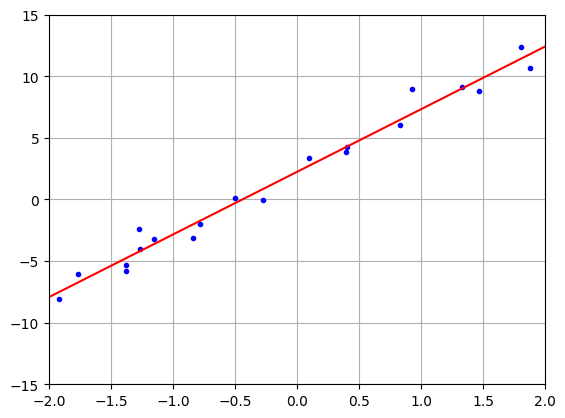

In [6]:
np.random.seed(42)
x_data = np.sort(-2. + 4. * np.random.rand(20))
y_data = 5. * x_data + 2.5 + np.random.randn(20)

X = torch.tensor(x_data[:,np.newaxis], dtype=torch.float32)
Y = torch.tensor(y_data[:,np.newaxis], dtype=torch.float32)

# Linear regression hypothesis using Pytorch
h = nn.Linear(1, 1, bias=True) # h = w x + b

optimizer = optim.SGD(h.parameters(), lr = .1) # stochastic gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

for i in range(50):
    optimizer.zero_grad()
    out = h(X)
    loss = Cost(out, Y)
    loss.backward()
    optimizer.step()

plt.plot(x_data, y_data, 'b.')
x = torch.tensor(np.linspace(-2.0, 2.0, 100).reshape(-1,1), dtype=torch.float32)
y = h(x).detach().numpy()
plt.plot(x,y,'r')
plt.ylim([-15, 15])
plt.xlim([-2, 2])
plt.grid('on')


## Non-Linear Example

We will design a 2-Hidden layers Neural Network to predict the following data

Epoch [500/10000], Loss: 6.1241
Epoch [1000/10000], Loss: 6.3476
Epoch [1500/10000], Loss: 4.1236
Epoch [2000/10000], Loss: 3.0675
Epoch [2500/10000], Loss: 2.6256
Epoch [3000/10000], Loss: 2.0130
Epoch [3500/10000], Loss: 1.8640
Epoch [4000/10000], Loss: 1.7384
Epoch [4500/10000], Loss: 1.6792
Epoch [5000/10000], Loss: 1.5723
Epoch [5500/10000], Loss: 1.3445
Epoch [6000/10000], Loss: 1.2024
Epoch [6500/10000], Loss: 1.1665
Epoch [7000/10000], Loss: 1.1107
Epoch [7500/10000], Loss: 0.9856
Epoch [8000/10000], Loss: 1.2108
Epoch [8500/10000], Loss: 1.1140
Epoch [9000/10000], Loss: 1.0331
Epoch [9500/10000], Loss: 1.0288
Epoch [10000/10000], Loss: 1.0245


Text(0.5, 1.0, 'Synthetic data')

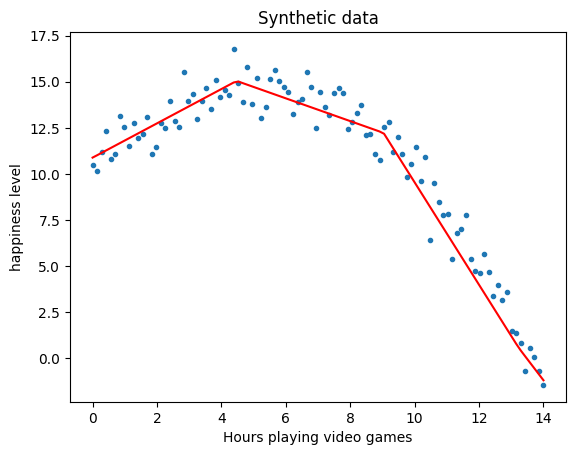

In [24]:
# Generate synthetic data for number of hours spend on video games vs happiness level
np.random.seed(42)
hours = torch.linspace(0, 14, 100).view(-1, 1) # 100 numbers between 0 and 14
happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2
x = hours
y = happiness
# Define a neural network
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(1, 6, bias=True)  # Input to hidden layer       
        self.layer2 = nn.Linear(6, 6)  
        self.layer3 = nn.Linear(6, 1)  # Hidden layer to output

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Instantiate the model, define loss function, and optimizer
model = MyModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x)
    # Compute the loss
    loss = criterion(y_pred, y)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


## Plot the results
plt.plot(x,y, '.')
out = model(x)
plt.plot(x,out.detach().numpy(), 'r')
plt.xlabel('Hours playing video games')
plt.ylabel('happiness level')
plt.title('Synthetic data')